<a href="https://colab.research.google.com/github/miaomiaoYao/HW/blob/main/CNeuro/CNeuro_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimal length of a dendritic arbor

> notations

+  **N**: numbers of neurons
+  **d**: wire diameter
+  **R**: average length of each axon sacles with linear dimension of the network
+  **L**: total length of dendrite 
+  **s**: the spine length 


> network volume (depends on different wiring design)

$$R^3 \sim NLd^2$$

+  Point-to-Point: 

$$L \sim NR$$

$$\Rightarrow R^3 \sim d^3N^3$$

+ Branching Axons:

$$L \sim N^{\frac{2}{3}}R$$

$$\Rightarrow R^3 \sim d^3N^\frac{5}{2}$$

+ Branching Axons and Dendrites:

$$\frac{L^2d}{R^3} \sim 1$$

$$\Rightarrow R^3 \sim d^3N^2$$

+ Branching Axons and Spiny Dendrites

the total volume $R^3$ could be devided into cubes of volume $d^3$, and there would be $\frac{R^3}{d^3}$ voxels

Each axons occupies $\frac{L}{d+s}$ voxels, and each dendrite occupies $\frac{L}{d}$ voxels, thus the fraction of voxels that containing both the axons and the dendrites could be $\frac{\frac{L}{d}}{\frac{R^3}{d^3}} \times \frac{\frac{L}{d+s}}{\frac{R^3}{d^3}} = \frac{L^2 d^5}{(d+s) R^6} \approx \frac{L^2 d^5}{s R^6} $

We can then calculate the number of voxels containing the axon and dendrites $\frac{L^2 d^5}{sR^6} \times \frac{R^3}{d^3} = \frac{L^2 d^2}{s R^3}$

Since axons and dendritic shafts should be in the limit of spine length s in order to get in touch with each other, so the voxels, which contains the axon and the dendrites and also satisfy the length limit, are in proportion of $\frac{s^2}{d^2}$, then the numbers that contains reachable axons and dendrites should be $\frac{L^2 d^2}{s R^3} \times \frac{s^2}{d^2} = \frac{L^2s}{R^3}$

And finally, we can get

$$\frac{L^2s}{R^3} \sim 1$$

$$\Rightarrow R^3 \sim \frac{d^4}{s}N^2$$

# Quantitative Analysis of Dendritic Morphology

## functions

In [64]:
# packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [65]:
def swc_reader(filepath):
    # load the data file (.swc)
    colnames = ["segment_index", "segment_type",
                "x", "y", "z",
                "segment_diameter", "father_segment_index"]
    file = pd.read_table(filepath, sep="\s+", names=colnames, header=None)
    return file


## load the data file

In [66]:
file_pyramidal = swc_reader("https://raw.githubusercontent.com/miaomiaoYao/HW/main/CNeuro/files/1%20pyramidal%20dendrite.txt")
file_purkinjie = swc_reader("https://raw.githubusercontent.com/miaomiaoYao/HW/main/CNeuro/files/2%20Purkinjie%20dendrite.txt")
file_arbor = swc_reader("https://raw.githubusercontent.com/miaomiaoYao/HW/main/CNeuro/files/3%20arbor%20from%20larval%20zebrafish.txt")

file_pyramidal.head()

,segment_index,segment_type,x,y,z,segment_diameter,father_segment_index
0,1,1,0.0,0.0,0.000,14.892,-1
1,2,1,0.0,0.0,13.237,14.892,1
2,3,3,-1.1,2.6,13.237,1.750,2
3,4,3,-2.0,4.1,13.637,1.500,3
4,5,3,-2.8,7.1,13.637,1.500,4


## plot and visualize neurons

In [67]:
def cell_visualization(filename):
    # visualize 3D cell
    x = filename["x"]
    y = filename["y"]
    z = filename["z"]

    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(projection="3d")
    ax.plot3D(x, y, z)
    ax.set_title("3d visualization of neurons")
    plt.show()

    return 0

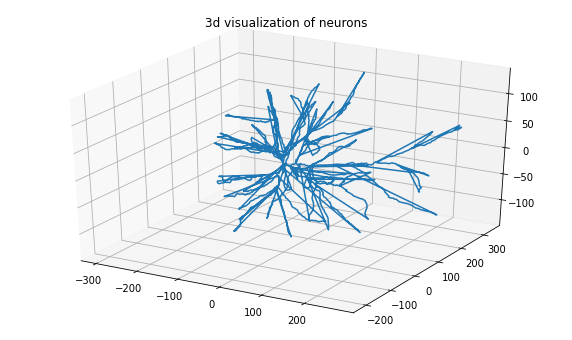

0

In [68]:
cell_visualization(file_pyramidal)

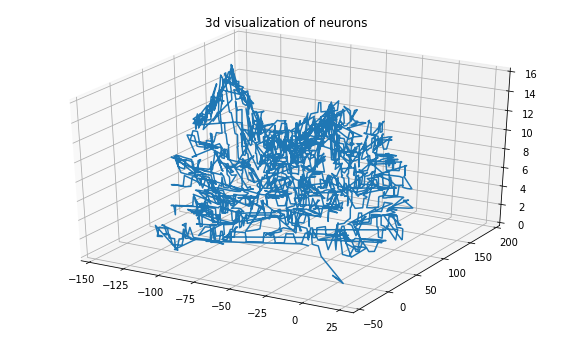

0

In [69]:
cell_visualization(file_purkinjie)

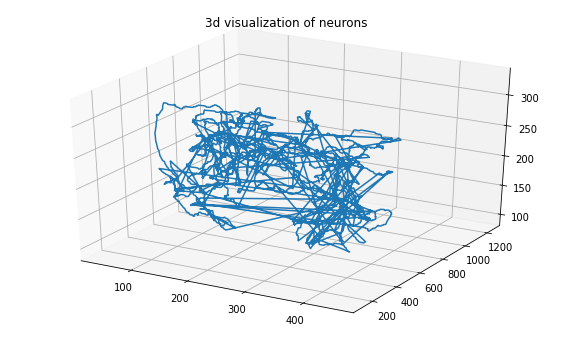

0

In [70]:
cell_visualization(file_arbor)

## mean path length

we try to apply the tree structure to the connection of each segments, and traversal the tree to calculate each branches' length, then average them

In [71]:
# we define a tree structure to describe the connection between segments
class dendritic_tree:
  def __init__(self, root_node):
    self.key = root_node[0]
    self.coordinate = root_node[1:3]
    self.father = root_node[4]
    self.child = None

  def add_child(self, child_node):
    t = dendritic_tree(child_node)
    self.child = t

In [72]:
def distance_between_segments(coordinate1, coordinate2):
  # calculate the distance between the adjoining segments
  # using straight-line distance
  return np.sqrt((coordinate1-coordinate2).pow(2).sum())


def distance_dendritic_to_soma(filename):
    #compute the mean path length from a dendritic segment to the soma
    cell_body = filename[filename["segment_type"] == 1][["segment_index","x","y","z","father_segment_index"]]
    dendritic = filename[filename["segment_type"] == 3][["segment_index","x","y","z","father_segment_index"]]
    soma = cell_body[["x","y","z"]].apply(np.mean, axis=0)
    root_node = cell_body.iloc[-1]
    root_node[["x","y","z"]] = soma
    root = dendritic_tree(root_node)
    for row in dendritic.iterrows():
      current_node = dendritic_tree(row) 
    # the obstacle here I met is to find an effective way to add child node to the father node
    # maybe I need some more time to finish those two questions


In [73]:
file_pyramidal.sort_values(by="father_segment_index")
# or there is another stupid method:
# sort out the nodes with more than one output and then add them manually

,segment_index,segment_type,x,y,z,segment_diameter,father_segment_index
0,1,1,0.0,0.0,0.000,14.892,-1
1,2,1,0.0,0.0,13.237,14.892,1
1936,1937,3,0.1,-2.9,10.537,0.750,2
2429,2430,3,0.1,0.2,16.637,1.750,2
901,902,3,2.9,2.2,13.237,1.750,2
...,...,...,...,...,...,...,...
2941,2942,3,74.5,-95.2,85.437,0.150,2941
2942,2943,3,75.2,-96.7,87.237,0.250,2942
2943,2944,3,76.0,-97.2,87.937,0.250,2943
2944,2945,3,77.3,-99.1,88.237,0.250,2944


## spine reach zone area

we still need the length of each branches of dendrite(from the result of above question) to calculate the area of the spine reach zone area

In [74]:
def spine_reach_zone(filename):
    #compute the border of the dendrite area
    dendritic = filename[filename["segment_type"].isin([3])][["x","y","z"]]
    dendritic_center = dendritic.apply(np.mean, axis = 0)
    distance = dendritic.apply(lambda x: np.sqrt((x-dendritic_center).pow(2).sum()), axis=1)
    R = max(distance)
    return R


# Motif Analysis of C. elegans Connectome

In [75]:
def connection_matrix_to_txt(matrix_file, label_file):
    # change the connection to the aggregated data for txt file which could be an input for mfinder
    label = pd.read_table(label_file, header=None)
    colname = label[0].tolist()
    matrix = pd.read_csv(matrix_file, names=colname)
    nrow = matrix.shape[0]
    ncol = matrix.shape[1]
    network = pd.DataFrame(columns=["start","end","connection"])
    k = 0
    for i in range(nrow):
      for j in range(ncol):
        if matrix.iloc[i,j] != 0:
          network.loc[k] = {"start":i+1, "end":j+1, "connection":matrix.iloc[i,j]}
          k = k+1
    return(network)


In [76]:
connection_file = connection_matrix_to_txt("https://raw.githubusercontent.com/miaomiaoYao/HW/main/CNeuro/files/celegans277matrix.csv",
                                            "https://raw.githubusercontent.com/miaomiaoYao/HW/main/CNeuro/files/celegans277labels.csv")
connection_file.to_csv(sep="\t", index=False) # 

'start\tend\tconnection\n1\t3\t1\n1\t5\t1\n1\t11\t1\n1\t71\t1\n1\t156\t1\n1\t196\t1\n2\t4\t1\n2\t6\t1\n2\t12\t1\n2\t43\t1\n2\t169\t1\n2\t177\t1\n2\t197\t1\n3\t4\t1\n3\t79\t1\n3\t80\t1\n3\t110\t1\n3\t122\t1\n4\t53\t1\n4\t70\t1\n4\t80\t1\n4\t110\t1\n4\t111\t1\n4\t123\t1\n5\t19\t1\n5\t42\t1\n5\t73\t1\n6\t18\t1\n6\t38\t1\n6\t43\t1\n6\t63\t1\n6\t72\t1\n6\t74\t1\n6\t157\t1\n6\t175\t1\n7\t52\t1\n7\t83\t1\n7\t208\t1\n8\t12\t1\n8\t64\t1\n8\t76\t1\n9\t17\t1\n9\t39\t1\n9\t71\t1\n10\t16\t1\n10\t39\t1\n10\t72\t1\n11\t7\t1\n11\t14\t1\n11\t17\t1\n11\t19\t1\n11\t38\t1\n11\t39\t1\n11\t40\t1\n11\t42\t1\n11\t48\t1\n11\t75\t1\n11\t112\t1\n11\t158\t1\n12\t8\t1\n12\t15\t1\n12\t20\t1\n12\t39\t1\n12\t41\t1\n12\t43\t1\n12\t45\t1\n12\t49\t1\n12\t75\t1\n12\t76\t1\n12\t159\t1\n13\t1\t1\n13\t7\t1\n13\t8\t1\n13\t12\t1\n13\t19\t1\n13\t20\t1\n13\t38\t1\n13\t39\t1\n13\t41\t1\n13\t43\t1\n13\t49\t1\n13\t73\t1\n13\t75\t1\n13\t76\t1\n13\t108\t1\n13\t109\t1\n13\t110\t1\n13\t111\t1\n13\t113\t1\n13\t166\t1\n13\t195\t1\n13\t1

we copy the result to a local txt file **hw_1_3_1**, and this is the [input](https://raw.githubusercontent.com/miaomiaoYao/HW/main/CNeuro/files/hw1_3_1.txt) of mfinder software, and the output file can be seen here

*   [2 node motifs](https://raw.githubusercontent.com/miaomiaoYao/HW/main/CNeuro/files/hw1_3_2_OUT.txt): 1918 2-node subgraphs, and the connection pattern can be seen [here](https://github.com/miaomiaoYao/HW/blob/88011377c8527133aaece1ef12f1e7d2e99f9538/CNeuro/pic/hw_1_3_1.png)

*   [3 node motifs](https://raw.githubusercontent.com/miaomiaoYao/HW/main/CNeuro/files/hw1_3_1_OUT.txt): 35477 3-node subgraphs, and the connection pattern can be seen [here](https://github.com/miaomiaoYao/HW/blob/88011377c8527133aaece1ef12f1e7d2e99f9538/CNeuro/pic/hw_1_3_2.png)



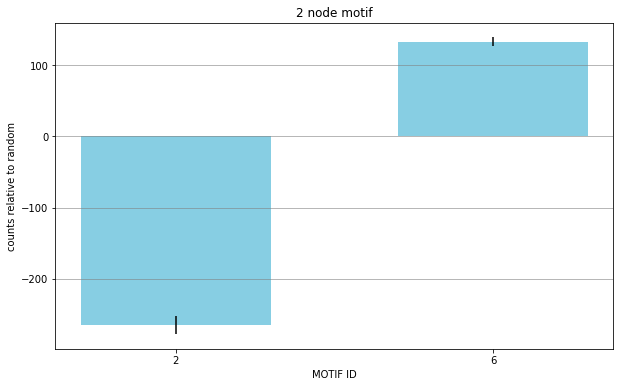

In [77]:
plt.figure(figsize=(10,6))
x = np.array(["2","6"])
y = np.array([1731-1996,187-54.5])
std_err=np.array([12.3,6.1])

bar_width=0.6
plt.bar(x, y, bar_width, color="#87cee3", align="center", yerr=std_err, alpha=1)

plt.xlabel("MOTIF ID")
plt.ylabel("counts relative to random")
plt.title("2 node motif")
plt.grid(axis="y", ls="-", color="gray", alpha=0.7)
plt.show()


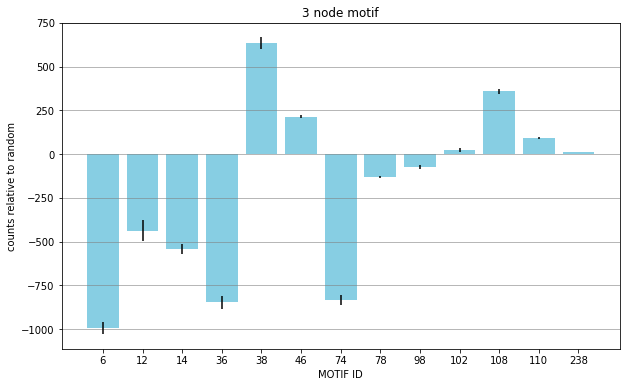

In [78]:
plt.figure(figsize=(10,6))
x = np.array(["6","12", "14", "36", "38", "46", "74","78", "98", "102", "108", 
              "110","238"])
y = np.array([8075-9067.0, 12049-12487.0, 2385-2929.0, 7355-8202.1, 1521-888.2, 
              299-84.7, 2633-3466.8, 281-411.6, 67-139.9, 170-146.1, 487-127.8,
              139-47.5, 16-2.9])
std_err=np.array([35.4, 60.3, 28.4, 34.8, 33.7, 10.7, 27.1, 8.0, 13.0, 12.4, 
                  13.1, 7.0, 1.5])

bar_width=0.8
plt.bar(x, y, bar_width, color="#87cee3", align="center", yerr=std_err, alpha=1)

plt.xlabel("MOTIF ID")
plt.ylabel("counts relative to random")
plt.title("3 node motif")
plt.grid(axis="y", ls="-", color="gray", alpha=0.7)
plt.show()